Code to visualize acceptance rates and submissions over time.

Data from https://github.com/lixin4ever/Conference-Acceptance-Rate.

Visualization code by [Chandan Singh](https://github.com/csinva).

In [2]:
!pip install beautifulsoup4
!pip install markdown

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from os.path import join as oj
import matplotlib as mpl
from bs4 import BeautifulSoup
import html5lib
import requests
import bs4
import markdown
import pandas
import requests
import lxml


# Read in and format the data

In [4]:
# tabs = pd.read_html('https://github.com/lixin4ever/Conference-Acceptance-Rate/blob/master/README.md')
# print(tabs)
# # html_content = BeautifulSoup(open("https://raw.githubusercontent.com/lixin4ever/Conference-Acceptance-Rate/master/README.md"), "html5lib")

# # tabs = html_content.findAll("table")

url = "https://raw.githubusercontent.com/lixin4ever/Conference-Acceptance-Rate/master/README.md"
response = requests.get(url).text
html = markdown.markdown(text=response, extensions=['tables'])
soup = bs4.BeautifulSoup(html, 'html.parser')
tabs = soup.find_all('table')
# headers = soup.find_all('h1')
# print(response)
print(tabs[0])
# print(headers[0])

<table>
<thead>
<tr>
<th>Conference      </th>
<th style="text-align: left;">Long Paper          </th>
<th style="text-align: left;">Short Paper</th>
</tr>
</thead>
<tbody>
<tr>
<td>ACL'14</td>
<td style="text-align: left;">26.2% (146/572)</td>
<td style="text-align: left;">26.1% (139/551)</td>
</tr>
<tr>
<td>ACL'15</td>
<td style="text-align: left;">25.0% (173/692)</td>
<td style="text-align: left;">22.4% (145/648)</td>
</tr>
<tr>
<td>ACL'16</td>
<td style="text-align: left;">28.0% (231/825)</td>
<td style="text-align: left;">21.0% (97/463)</td>
</tr>
<tr>
<td>ACL'17</td>
<td style="text-align: left;">25.0% (195/751)</td>
<td style="text-align: left;">18.9% (107/567)</td>
</tr>
<tr>
<td>ACL'18</td>
<td style="text-align: left;">25.3% (258/1018)</td>
<td style="text-align: left;">24.0% (126/526)</td>
</tr>
<tr>
<td>ACL'19</td>
<td style="text-align: left;">25.7% (447/1737)</td>
<td style="text-align: left;">18.2% (213/1168)</td>
</tr>
<tr>
<td>ACL'20</td>
<td style="text-align: left;">

In [38]:


dfs = []
for t0 in tabs:
    # print(t0)
    t0 = pd.read_html(str(t0))[0]
    # print("==============")
    # print(t0)
    t0['confname'] = t0['Conference'].str.split("'").str[0]
    t0['year'] = (
        t0['Conference'].str.split("'").str[1]
        .str.split(" ").str[0].astype(int)
    )
    t0['acc_rate'] = t0['Long Paper'].str.split("%").str[0]
    t0['acc_rate'] = (
        t0['acc_rate']
        .replace('~', '')
        .replace('?', "")
        .replace('-', "")
        # .astype(float)
    )
    t0['submissions'] = (
        t0['Long Paper'].str.split("/")
        .str[1].str.split(')')
        .str[0].replace('1000+', '1000')
        .replace('?', "")
        .replace('~', '')
        .replace('NaN', np.nan)
        # .astype(float)
    )
    dfs.append(t0)

# print(dfs)
df = pd.concat(dfs)
# print(df)

df = df.dropna() # drop rows with missing vals
df = df[df['year'] <= 23] # drop year too high
df = df[df['year'] >= 14] # drop year too low
print(df.columns)
print(df['confname'].unique())
df.to_csv("/content/conf_sub_acc.csv")

Index(['Conference', 'Long Paper', 'Short Paper', 'confname', 'year',
       'acc_rate', 'submissions'],
      dtype='object')
['ACL' 'EMNLP' 'NAACL-HLT' 'COLING' 'CVPR' 'ICCV' 'ECCV' 'ICML' 'NeurIPS'
 'ICLR' 'COLT' 'UAI' 'AISTATS' 'AAAI' 'IJCAI' 'KDD' 'SIGIR' 'TheWebConf'
 'WSDM' 'CIKM' 'ICDM' 'RecSys' 'INTERSPEECH' 'ICASSP']


In [47]:
df = pd.read_csv("/content/conf_sub_acc.csv")

print(df['submissions'])

0       572
1       692
2       825
3       751
4      1018
       ... 
195    2829
196    3815
197    3610
198    3967
199    3967
Name: submissions, Length: 200, dtype: int64


# Make the plot

(200, 8)
Index(['Unnamed: 0', 'Conference', 'Long Paper', 'Short Paper', 'confname',
       'year', 'acc_rate', 'submissions'],
      dtype='object')
     Unnamed: 0 Conference         Long Paper Short Paper confname  year  \
195          12  ICASSP'18  49.7% (1406/2829)           -   ICASSP    18   
196          13  ICASSP'19  46.5% (1774/3815)           -   ICASSP    19   
197          14  ICASSP'21  48.0% (1734/3610)           -   ICASSP    21   
198          15  ICASSP'22  45.0% (1785/3967)           -   ICASSP    22   
199          16  ICASSP'23          ?% (? /?)           -   ICASSP    23   

     acc_rate  submissions  
195      49.7         2829  
196      46.5         3815  
197      48.0         3610  
198      45.0         3967  
199      45.0         3967  
['ACL' 'EMNLP' 'NAACL-HLT' 'COLING' 'CVPR' 'ICCV' 'ECCV' 'ICML' 'NeurIPS'
 'ICLR' 'COLT' 'UAI' 'AISTATS' 'AAAI' 'IJCAI' 'KDD' 'SIGIR' 'TheWebConf'
 'WSDM' 'CIKM' 'ICDM' 'RecSys' 'INTERSPEECH' 'ICASSP']


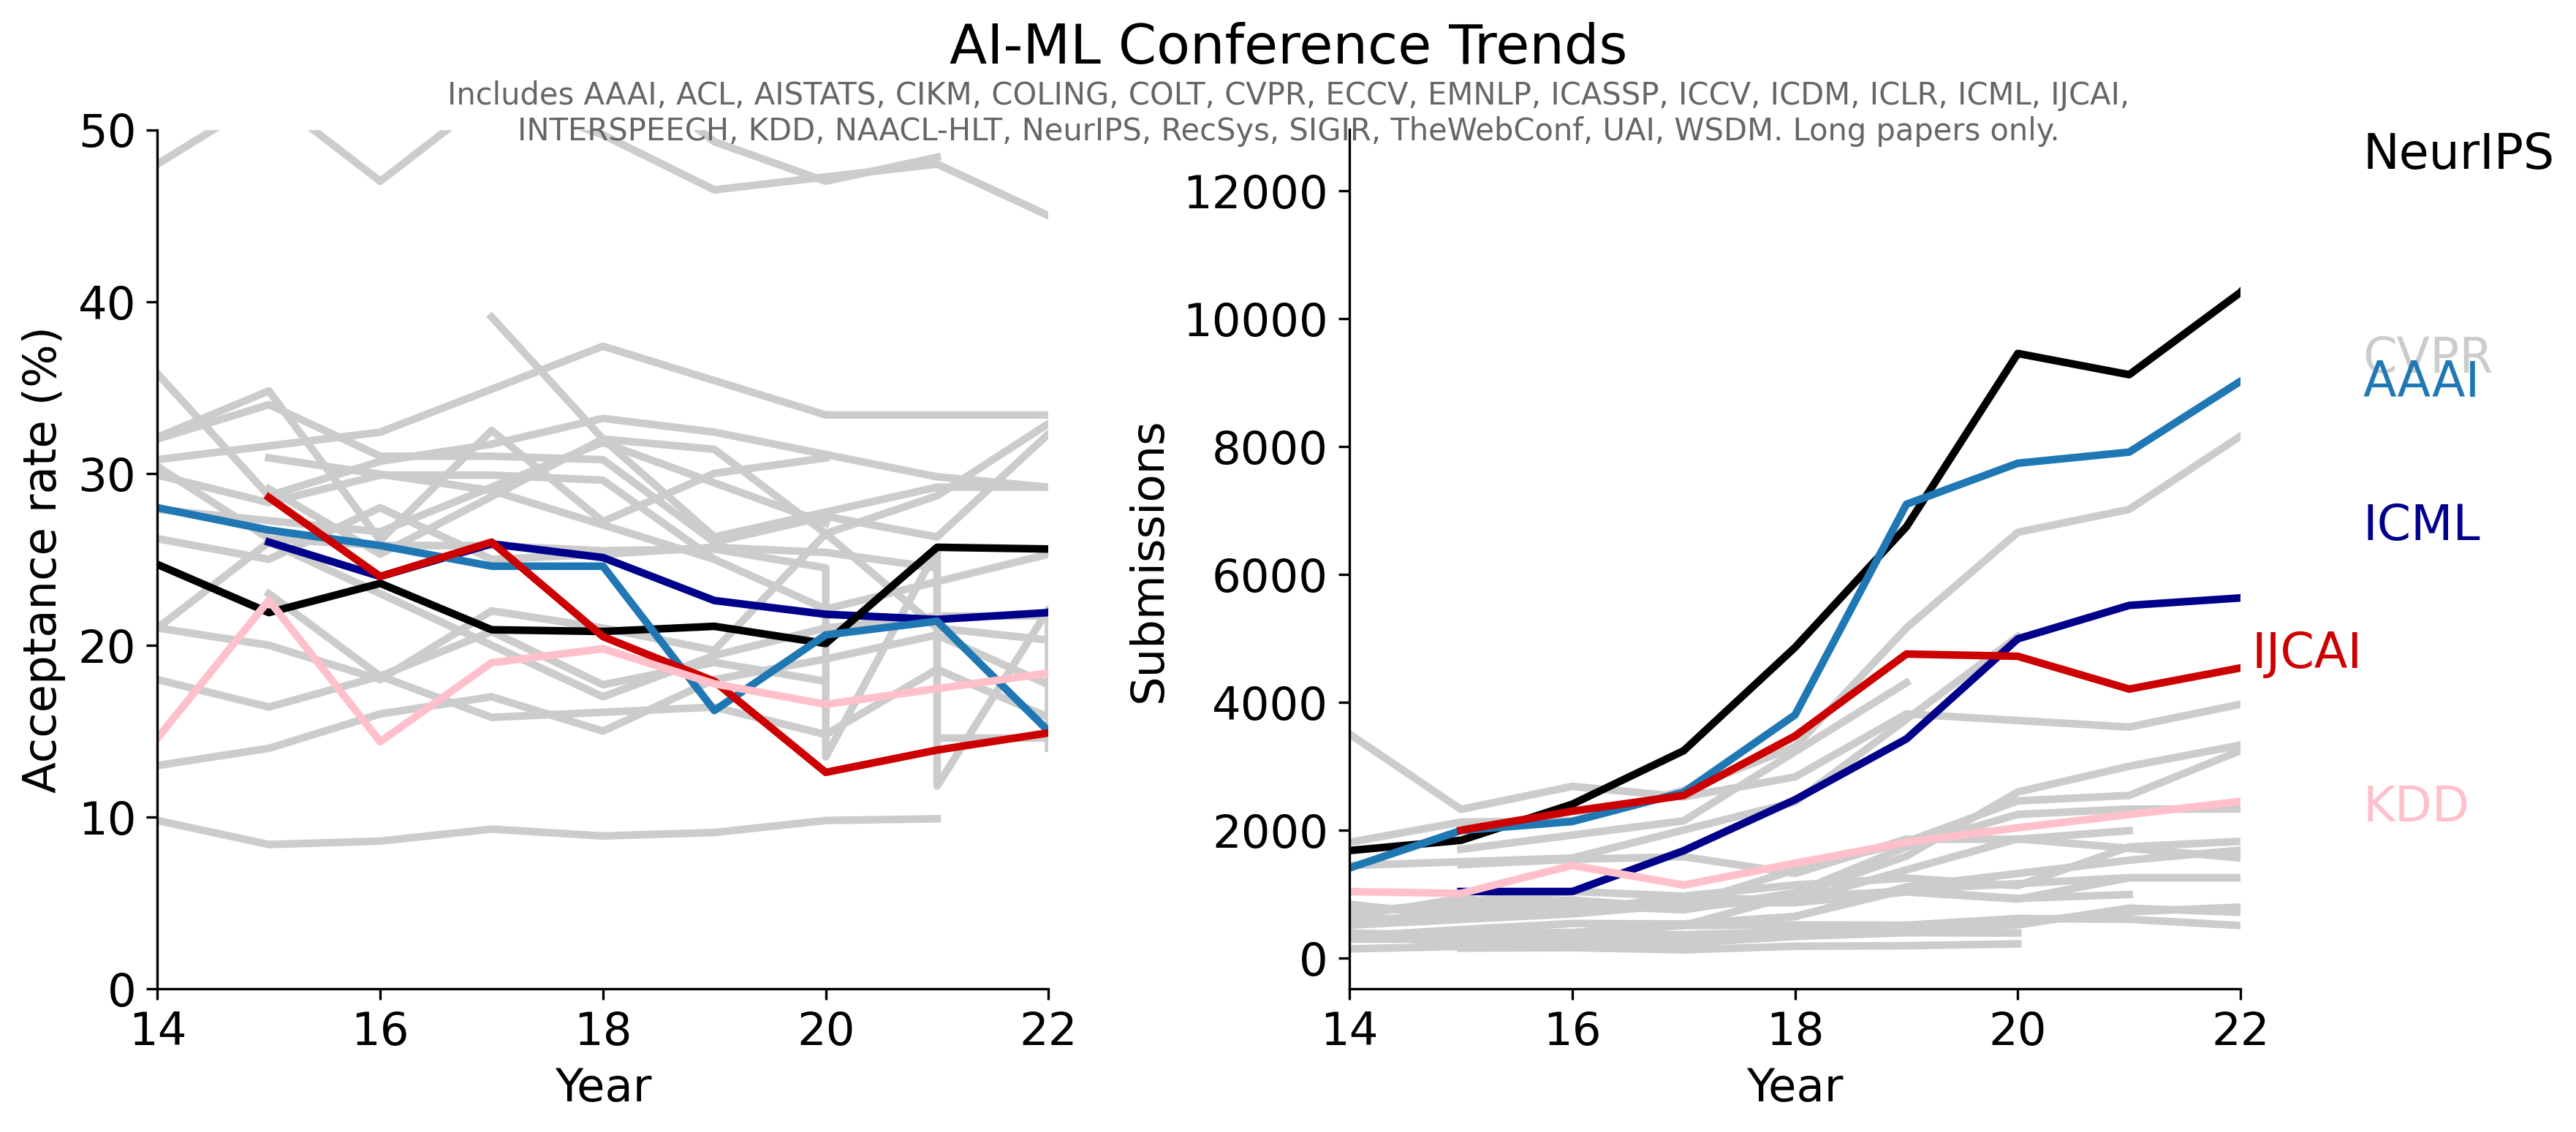

In [48]:
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['figure.autolayout'] = True
mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['axes.labelsize'] = 15
mpl.rcParams['font.size'] = 15
mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['ytick.labelsize'] = 15
plt.figure(figsize=(12, 5), dpi=300, facecolor='w')


def get_color(confname):
    c = '#cccccc'
    if confname == 'NeurIPS':
        return 'black'
    elif confname == 'AAAI':
        return '#1f77b4'
    elif confname == 'IJCAI':
        return '#cc0000'
    elif confname == 'KDD':
        return 'pink'
    elif confname == 'ICML':
        return 'darkblue'
    return c

def confname_is_special(confname):
    return confname in ['KDD', 'AAAI', 'IJCAI', 'ICML', 'NeurIPS','CVPR']

# acc rate plot
print(df.shape)
print(df.columns)
print(df[-5:])
ax1 = plt.subplot(1, 2, 1)
print(df.confname.unique())
for confname in df.confname.unique():
    conf = df[df.confname == confname]
    ax1.plot(conf.year, conf.acc_rate, label=confname,
             color=get_color(confname), lw=2.5, zorder=int(confname_is_special(confname)))

ax1.set_xlim((14, 22))
ax1.set_ylim((0, 50))
ax1.set_xlabel('Year')
ax1.set_ylabel('Acceptance rate (%)')

# submissions plot
plt.subplot(1, 2, 2)
for confname in df.confname.unique():
    conf = df[df.confname == confname]
    plt.plot(conf.year, conf.submissions, label=confname, color=get_color(confname), lw=2.5,
             zorder=int(confname_is_special(confname)))
    if confname_is_special(confname):
        x = conf.year.max() + 0.1
#         x = 22 + 0.1
        plt.text(x, conf.submissions.values[-1], confname,
                 color=get_color(confname), fontsize=16)
plt.xlim((14, 22))
plt.xlabel('Year')
plt.ylabel('Submissions')

# add titles
plt.subplots_adjust(bottom=0.1, top=0.38)
plt.figtext(.5, 1,'AI-ML Conference Trends', fontsize=18, ha='center')
# ', '.join(sorted(df.confname.unique()))
plt.figtext(.5,.93,'Includes ' + 'AAAI, ACL, AISTATS, CIKM, COLING, COLT, CVPR, ECCV, EMNLP, ICASSP, ICCV, \
ICDM, ICLR, ICML, IJCAI,\nINTERSPEECH, KDD, NAACL-HLT, NeurIPS, RecSys, SIGIR, TheWebConf, UAI, WSDM. Long papers only.',
            fontsize=10,ha='center', color='#666666')
plt.savefig('conference_trends.png', dpi=300)
plt.show()